# Credit Card Approval mit Machine Learning
***
WWI20DSA; Semester-4;  <br>
Chengyi Hua (8883221); Yassir Knierim (7362794); Jan Rüdt (1737304) <br>
Textaufwand und Verfasser mit @... dargestellt
***

## Projektbeschreibung

Da Banken zahlreiche Kreditkartenanträge erhalten, wäre eine händische Auswertung fehleranfällig, zeitaufwendig und damit teuer. Die Anträge können heutzutage mithilfe von Machine Learning sehr gut automatisiert werden. Komplexe Modelle erziehlen mittlerweile bessere und objektivere Ergebnisse. Dieses Verfahren ist momentan Standart bei jeder kommerziellen Bank.
Das Kredit-Scoring ist eine weit verbreitete Methode des Risikomanagements im Finanzsektor. Es verwendet persönliche Informationen und Daten, die von Kreditkartenantragstellern bereitgestellt werden, um zukünftige Insolvenzen und Kreditkartendarlehen abzuschätzen. Die Bank ist befugt zu entscheiden, ob sie dem Antragsteller eine Kreditkarte zur Verfügung stellt oder nicht. Kredit-Scores können das Risikoniveau objektiv einschätzen. 

In diesem Projekt ist das Ziel, ein maschinelles Lernmodell zu finden, welches mit möglichst wenigen Error-Typ II Fehlern vorhersagt, ob ein Antragssteller in diesem Datensatz ein „guter“ oder „schlechter“ Benutzer ist. Durch die Zielvariable soll vorhergesagt werden, ob der Kunde als Risikobenutzer klassifiziert wird oder nicht.


@Alle
<br>
<br>

## Ziel:
![](confusionM.png) fig(1), Source: siehe Hilfsmittelübersicht<br><br>

In Fig(1) ist eine Confusion Matrix für binäre Klassifikation ersichtlich. Eine Confusion Matrix ist ein Visualisierungstool für die Evaluation eines Klassifikationsmodells. Auf einer Achse sind die vorhergesagten Klassen ersichtlich, auf der anderen die tatsächlichen Klassen. Bei einem Klassifikationsmodell kann so jede Klassifikation einer Zelle der Matrix zugeordnet werden. Falls viele Klassifikationen auf die Diagonale der Matrix, ist das Ergebnis gut. Die anderen Zellen stellen mögliche Fehler dar. So ist schnell erkennbar, wie gut das Modell arbeitet.

In diesem Projekt werden risikobehaftete Kunden als 1 und risikofreie als 0 definiert. Dabei ist es wichtig , den Fehler Typ II soweit wie möglich zu vermeiden. In diesem Fall bedeutet Fehler Type II, dass Kunden eine credit card approval bekommen würden, obwohl sie als risikobehaftet erkannt werden sollten.
Error Typ I wären Kunden, die abgelehnt wurden, obwohl sie eigentlich eine Zusage erhalten hätten sollen. Da Error Typ II für die Bank deutlich höhere finanzielle Risiken darstellen, gilt es diese zu minimieren.

@Jan Rüdt
<br><br>
 
Hürden: <br>
-  Das Problem der unausgeglichenen Daten ist ein wesentliches Problem in diesem Projekt.<br>
Mögliche Lösung: Verwenden des Paket PyCaret, um den unausgeglichenen Datensatz auszugleichen
-  Experimente mit verschiedene Modelle und das Finden von geeignete Modellen. Schnelleres Vorgehen mit __PyCaret__ möglich
-  Down- oder Oversampling 

### Definition der Parameter
| Attribut Bezeichnung | Beschreibung | Kommentar |
| ------------ | ----------- | ------- |
|applicant_ID| Kundennummer |Für das Modell nicht relevant |	
|gender|	Geschlecht|Kategorial	|
|owning_car|	Autobesitz	|Kategorial |
|owning_property|	Immobilienbesitz	|Kategorial |
|children_amt|	Anzahl von Kindern|Kategorisch |	
|anual_income|	Jährliches Einkommen|Numerisch |	
|education_level|	Bildungsniveau	|Kategorial |
|marital_status|	Familienstand	|Kategorial |
|housing_type|	Wohnsituation	|Kategorial |
|age|Alter |Numerisch |
|working_years|	Arbeitsdauer in Jahren|Numerisch |	
|owning_phone|	Handybesitz	|Kategorial |
|owning_work_phone|	Arbeitshandybesitz	|Kategorial |
|owning_email|	Emailbesitz	|Kategorial |
|job|Arbeitstitel|Kategorial |
|payment_status|	Status|1: 1–29 Tage überfällig<br> 2: 30–59 Tage überfällig<br> 3: 60–89 Tage überfällig<br> 4: 90–119 Tage überfällig<br> 5: 120–149 Tage überfällig<br> 6: Überfällig oder uneinbringlich, Abschreibungen für mehr als 150 Tage<br> -1: in diesem Monat abbezahlt<br> 0: kein Darlehen für den Monat. Kategorial|
|risk_user|	Ziel|	Risikonutzer sind mit „1“ gekennzeichnet, ansonsten mit „0“. Kategorial|

Tabelle (1)<br>
@Dennis Knierim

***
## Loading dependencies
***

In [3]:
from operator import imod
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as mso
import warnings
import pycaret
import math
from collections import Counter
from numpy.random import default_rng
from imblearn.under_sampling import *
import imblearn
from sklearn.model_selection import KFold
from pycaret.classification import *
#import featurewiz as FW
#from lazytransform import LazyTransformer
import sklearn
#from featurewiz import SuloClassifier, print_sulo_accuracy

# --- Libraries Settings ---
#warnings.filterwarnings('ignore')
#plt.rcParams['figure.dpi'] = 100

## Datenaufbereitung

Die Datenaufbereitung ist ein Prozess, der die Reinigung, Umformung und Transformation von Daten umfasst, um bessere Ergebnisse für Machine Learning und Künstlige Intelligenz zu erziehlen. Erst nach diesem Prozess können analytische Aufgaben optimal durchgeführt werden und effiziente und zuverlässige Ergebnisse erziehlt werden. 
Die Datenaufbereitung umfasst normalerweise die Standardisierung von Datenformaten, die Anreicherung von Quelldaten und die Beseitigung von Ausreißern. Sie umfasst die fünf Schritte:
1. Sammlung der Daten
2. Ermittlung und Bewertung der Daten
3. Bereinigung und Prüfung der Daten
4. Transformation und Anreicherung der Daten
5. Speicherung der Daten  
<br>


<br>
In diesem Projekt wurde die Datenaufbereitung folgendermaßen durchgeführt:
Zunächst wurden die kategorialen Attribute gesammelt und in der Variable "categorical_features" gespeichert.
Anschließend wurden die Tage, seit denen eine Person eine Job hat in Jahre und die Tage seit Geburt in Jahre umgewandelt. Auch wurde das Jahreseinkommen in ein nummerisches Attribut umgewandelt. Die Spalte "Flag_Mobil", die aussagt, ob jemand ein Mobiltelefon besitzt, wurde verworfen.
Dann wurden die Spalten in passendere Beschreibungen umbenannt. In den Splaten "owning_car", "owning_property", "risk_user" und "payment_status" wurden Optimierungen vorgenommen, indem Werte angepasst wurden.
<br>
@Jan Rüdt

In [30]:
categorical_features = ['gender','owning_car','children_amt', 'owning_property', 'education_level','marital_status', 'housing_type', 'job']

In [4]:
cca =  pd.read_csv('credit_card_approval.csv')
# rough years of employment
cca.DAYS_EMPLOYED = abs(cca.DAYS_EMPLOYED) // 365
# finding out each customers age
cca.DAYS_BIRTH =  abs(cca.DAYS_BIRTH) // 365  
cca.AMT_INCOME_TOTAL = pd.to_numeric(cca.AMT_INCOME_TOTAL)
# dropping unneccessary attributes
cca = cca.drop("FLAG_MOBIL", axis=1)



cca.rename(columns = {'CODE_GENDER':'gender', 
                      'DAYS_BIRTH': 'age',
                      'DAYS_EMPLOYED': 'working_years',
                      'FLAG_OWN_CAR':'owning_car',
                      'FLAG_OWN_REALTY': 'owning_property',
                      'CNT_CHILDREN': 'children_amt',
                      'AMT_INCOME_TOTAL': 'anual_income',
                      'NAME_EDUCATION_TYPE': 'education_level',
                      'NAME_FAMILY_STATUS': 'marital_status',
                      'NAME_HOUSING_TYPE': 'housing_type',
                      'FLAG_WORK_PHONE': 'owning_work_phone',
                      'FLAG_EMAIL': 'owning_email',
                      'FLAG_PHONE': 'owning_phone',
                      'STATUS': 'payment_status',
                      'TARGET': 'risk_user',
                      'JOB': 'job',
                      'ID': 'applicant_ID'
                      }, inplace = True)


cca["owning_car"].replace({'Y' : '1', 'N': '0'}, inplace= True)
cca["owning_property"].replace({'Y' : '1', 'N': '0'}, inplace= True)
cca["risk_user"].replace({'1' : 'Y', '0': 'N'}, inplace= True)
cca["payment_status"].replace({'0' : '1', 
                               '1': '2', 
                               '2': '3', 
                               '3': '4', 
                               '4': '5', 
                               '5': '6', 
                               'C': '-1', 
                               'X': '0'}, inplace= True)
cca.payment_status = [int(i) for i in cca.payment_status ]
cca = cca.sort_values('applicant_ID')



In [5]:
#cca.dtypes

In [6]:
def get_count_of(applicant_frame,column,credit_type):
    df = applicant_frame
    values = df[column].value_counts()
    try:
        return values[values.index==credit_type][0]
    except:
        return 0

cca_credit_analysis = cca.copy()
cca_credit_analysis['payment_status'].replace({0:'no_credit',
        -1:'good',
        1:'good',
        2:'bad',
        3:'bad',
        4:'bad',
        5:'bad',
        6:'bad'}, inplace=True)
#test
#get_count_of(cca_credit_analysis[cca_credit_analysis.applicant_ID==5008806],'payment_status','good')

In [7]:
good_mapping = {i:get_count_of(cca_credit_analysis[cca_credit_analysis.applicant_ID==i],'payment_status','good') for i in list(cca.applicant_ID.unique())}
bad_mapping = {i:get_count_of(cca_credit_analysis[cca_credit_analysis.applicant_ID==i],'payment_status','bad') for i in list(cca.applicant_ID.unique())}
no_mapping = {i:get_count_of(cca_credit_analysis[cca_credit_analysis.applicant_ID==i],'payment_status','no_credit') for i in list(cca.applicant_ID.unique())}

In [8]:
cca['total_good_credit'] = cca.applicant_ID.map(good_mapping)
cca['total_bad_credit'] = cca.applicant_ID.map(bad_mapping)
cca['total_no_credit'] = cca.applicant_ID.map(no_mapping)

Im nächsten Schritt wurden die Spalten 'total_good_credit', 'total_bad_credit' und 'total_no_credit' hinzugefügt. Die Spalte 'payment status' drückte ursprünglich aus, wie weit ein Kunde mit seinen bisherigen Krediten in Zahlungsverzug ist (siehe Tabelle 1). Der Wert 0 wurde nun so gewertet, dass kein Kredit vorhanden ist, -1 und 1 als rechtzeitige Rückzahlungen und Werte über 2 als in Zahlungsverzug. In den neuen Spalten wurde nun für jeden Kunden gezählt und gespeichert, wie oft die Werte vorkommen.



![](Data_processing.png)

@Jan Rüdt

In [8]:
# checking for datatype of the different attributes
#print(cca.dtypes)

# getting insides into the attribute contents, Check for na and errors
#columns = []
#for n in cca.columns:
#    columns.append(n)

#for n in columns:  
#    print(n)
#    print(cca[n].unique())
#    for i in cca[n].isna():
#        if i == True:
#            print("AHAAAA")
#    print('\n \n')   
#print(cca.isnull().sum())


In [9]:
cca_t0 = cca[cca.BEGIN_MONTHS==0]
#cca_t0

Im letzten Schritt der Datenaufbereitung wurden die Dimensionen reduziert, indem sich zeitlich auf den Beginnmonat bzw. die Startsituation beschränkt wurde (t=0). Die Daten wurden ursprünglich pro Monat erhoben und in absteigender Reihenfolge dokumentiert z.B. t=-1 waren die Daten auf dem zweiten Monat. Auch wurden Duplikate in der Kunden ID bereinigt.


In [11]:
cca_unique_id = cca_t0.drop_duplicates('applicant_ID')
cca_unique_id.sample(5)

,applicant_ID,gender,owning_car,owning_property,children_amt,anual_income,education_level,marital_status,housing_type,age,...,owning_work_phone,owning_phone,owning_email,job,BEGIN_MONTHS,payment_status,risk_user,total_good_credit,total_bad_credit,total_no_credit
519655,5054053,M,1,0,1 children,112500.0,Secondary / secondary special,Married,Rented apartment,31,...,1,0,0,Laborers,0,-1,0,19,0,20
193281,5099717,M,1,0,No children,247500.0,Secondary / secondary special,Married,House / apartment,38,...,0,0,0,Drivers,0,2,0,3,1,0
389472,5042258,F,0,1,No children,247500.0,Secondary / secondary special,Married,House / apartment,26,...,0,0,0,Cooking staff,0,1,0,1,0,1
33516,5139467,M,1,1,No children,135000.0,Incomplete higher,Married,House / apartment,26,...,0,0,0,Sales staff,0,-1,0,24,0,0
333591,5047812,F,1,0,No children,103500.0,Higher education,Married,House / apartment,39,...,1,1,0,Sales staff,0,-1,0,17,0,9


***
## Deskriptive Analyse / Visualisierung 
***
Die deskriptive Analyse, auch bekannt als deskriptive Analytik oder deskriptive Statistik, ist der Prozess der Verwendung statistischer Techniken zur Beschreibung oder Zusammenfassung einer Reihe von Daten. Als eine der wichtigsten Arten der Datenanalyse ist die deskriptive Analyse beliebt, da sie zugängliche Erkenntnisse aus Daten generieren kann. 

Im Gegensatz zu anderen Arten der Datenanalyse versucht die deskriptive Analyse nicht, Vorhersagen über die Zukunft zu treffen. Stattdessen zieht es Erkenntnisse ausschließlich aus vergangenen Daten, indem es sie auf eine Weise manipuliert, die sie aussagekräftiger macht.

@Chengyi Hua

In [12]:
fig = go.Figure([go.Bar(x=['N','Y'], y=[cca_unique_id[cca_unique_id.risk_user==0].count()[0], cca_unique_id[cca_unique_id.risk_user==1].count()[0]])])
fig

fig(2): Verhältnis zwischen risikofreien und risikobehafteten Clients

In [13]:
def class_count(y):
    counter = Counter(y)
    for k, v in counter.items():
        dist = v / len(y) * 100
        print(f"Class={k}, n={v} ({dist}%)")

class_count(cca_unique_id.risk_user)

Class=0, n=16980 (99.63034676993487%)
Class=1, n=63 (0.3696532300651294%)


Unser Datensatz weist weniger als 1% seltener, aber “interessanter” Ereignisse auf. In der letzten Visualisierung über alle Clients sehen wir deutlich, dass die Clients, die als risikofrei klassifiziert sind, eine Majority darstellen. Während nur ein Bruchteil, weniger als 1% die Risikogruppe darstellt. Ein Klassenlabel hat also eine sehr hohe Anzahl von Beobachtungen und das andere eine sehr niedrige Anzahl von Beobachtungen. Das entspricht die Definition eines Imbalanced Datasets. Ein Datensatz ist dann unausgewogen, wenn die Zielklasse, in unserem Fall die Risikogruppe eine starke Minderheit darstellt. 

#### Problem mit unausgeglichenem Datensatz  
Wenn eine Klasse überrepräsentiert ist, während eine andere unterrepräsentiert ist, tritt das Problem der Skewness auf. In diesem Fall werden Daten als skrewed Daten bezeichnet. In unserem Projekt könnte es für ein Modell sehr einfach sein, immer mit hoher Genauigkeit die Risikokategorie vorherzusagen, indem es einfach alles immer als risikofrei bezeichnet. Die meisten Modelle suchen nach dem Overall, allgemeinen Accuracy und ignorieren dabei oft die starke Minderheit, wenn die Vorhersage auf Mehrheit fast immer zutreffend ist. Diese Art von Problem wird als Problem der unausgeglichenen Klassifizierung bezeichnet. Sollte dennoch Modelle ohne Datenanpassung trainiert werden, werden nicht vertrauenswürdige Ergebnisse geliefert. Im Folgenden dann ggf. falsch interpretiert und irreführende Handlungsanweisungen abgeleitet, die zu fatalen Fehler führen könnten. 
<br> 

@Chengyi Hua 



In [14]:
#extracting applicants not being risk user
non_risk_user = cca_unique_id[cca_unique_id.risk_user == 0]
#not_risk.sample(10)

#extracting applicants being risk user
risk_user = cca_unique_id[cca_unique_id.risk_user == 1]
#risk.sample(10)

In [15]:
fig = go.Figure([go.Bar(x=['F','M'], 
y=[cca_unique_id[cca_unique_id.gender=='F'].count()[0], cca_unique_id[cca_unique_id.gender=='M'].count()[0]])])
fig

- fig(3): Verteilung von Männern und Frauen in der Tabelle cca. In der Tabelle sind viel mehr Frauen als Männer aufgelistet.

In [16]:
class_count(cca_unique_id.gender)

Class=M, n=6518 (38.24444053277005%)
Class=F, n=10525 (61.75555946722995%)


In [17]:
fig = go.Figure([go.Bar(x=['F','M'], 
y=[risk_user[risk_user.gender=='F'].count()[0], risk_user[risk_user.gender=='M'].count()[0]])])
fig

- fig(4): Verteilung von Männern und Frauen, die als "Risk User" gekennzeichnet wurden. Männliche Risk User sind etwas häufiger vorhanden als weibliche Risk User.

In [18]:
class_count(risk_user.gender)

Class=M, n=32 (50.79365079365079%)
Class=F, n=31 (49.2063492063492%)


In [19]:
fig = go.Figure([go.Bar(x=['F','M'], 
y=[non_risk_user[non_risk_user.gender=='F'].count()[0], non_risk_user[non_risk_user.gender=='M'].count()[0]])])
fig

- fig(5): Verteilung von Männern und Frauen, die als Non-Risk User gekennzeichnet wurden. Man sieht dass es deutlich mehr weibliche Non-Risk User gibt als männliche. 

- Fazit: Obwohl es im Datensatz erheblich mehr weibliche Kunden als männliche gibt, ist die Anzahl der männlichen Risk User doch höher. Die Anzahl der weiblichen Non-Risk User ist auch höher als die der männlichen. Somit hat ein männlicher Kunde eine höhere Wahrscheinlichkeit als Risk-User eingestuft zu werden, als ein weiblicher.

In [20]:
class_count(non_risk_user.gender)

Class=M, n=6486 (38.197879858657245%)
Class=F, n=10494 (61.802120141342755%)


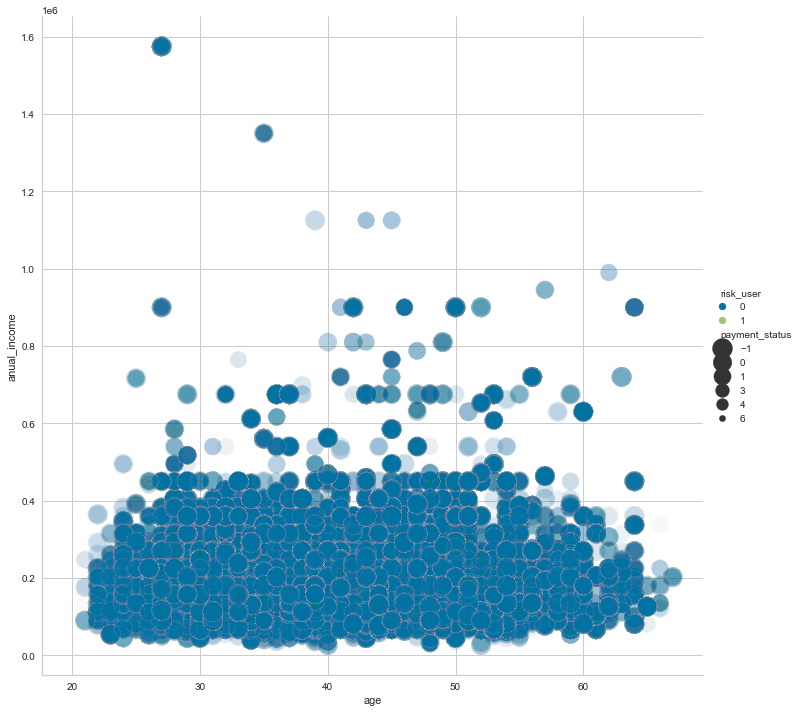

In [21]:
plot_1 = sns.relplot(x='age', y='anual_income', hue='risk_user',size='payment_status',data=cca,
sizes=(400,40),alpha=0.01,height=10)

- fig(6): In dieser Visualisierung versuchen wir eine klare Abtrennung von Risk- und Non-Risk-Unsern darzustellen. Wir plotten dazu die Parameter 'age', 'annual income'  und 'payment status' bei Risk und Non-Risk user. Allerdigns kann keine klare Abtrennung im Scatter-Plot beobachtet werden. Zu sehen ist lediglich, dass die blauen Punkte, die Non-Risk-User darstellen, kleiner sind als die gelben Punkte, die Risk-User darstellen. Man schließt daraus, dass sich lediglich der Parameter 'payment_status' in den beiden Kategorien klar unterscheidet.



In [22]:
y_list=[]
for i in list(risk_user.payment_status.unique()):
    y_list.append(risk_user[risk_user.payment_status==i].count()[0])

fig = go.Figure([go.Bar(x=list(risk_user.payment_status.unique()), 
y=y_list)])
fig

- fig(7): dieser Plot zeigt den 'payment status' aller Risk-User. Es zeichnet sich heraus, dass die meisten Personen in dieser Gruppe einen Zahlungsstatus von 6 haben, also mit ihren Rückzahlungen stark im Verzug sind. Dies war bereits zu erwarten. (siehe Tabelle 1) 

In [23]:
class_count(risk_user.payment_status)

Class=4, n=3 (4.761904761904762%)
Class=6, n=44 (69.84126984126983%)
Class=3, n=12 (19.047619047619047%)
Class=5, n=4 (6.349206349206349%)


In [24]:
y_list=[]
for i in list(non_risk_user.payment_status.unique()):
    y_list.append(non_risk_user[non_risk_user.payment_status==i].count()[0])

fig = go.Figure([go.Bar(x=list(non_risk_user.payment_status.unique()), 
y=y_list)])
fig

- fig(8): Dieser Plot zeigt den Zahlungsstatus aller Non-Risk User. Sie sind mit ihren Rückzahlungen pünktlich oder nur leicht im Verzug, was einen starken Kontrast zu den Risk Usern darstellt.

In [25]:
class_count(non_risk_user.payment_status)

Class=-1, n=8890 (52.35571260306242%)
Class=1, n=4783 (28.16843345111896%)
Class=0, n=3138 (18.480565371024735%)
Class=2, n=169 (0.9952885747938751%)


In [26]:
y_list=[]
for i in list(risk_user.housing_type.unique()):
    y_list.append(risk_user[risk_user.housing_type==i].count()[0])

fig = go.Figure([go.Bar(x=list(risk_user.housing_type.unique()), 
y=y_list)])
fig


- Fig(9): Dieser Plot zeigt die Wohnungsform, in der die Risk User leben. Es wird ersichtlich, dass die meisten Risk User in einem eigenem Haus oder einer eigenen Wohnung leben.

In [27]:
y_list=[]
for i in list(non_risk_user.housing_type.unique()):
    y_list.append(non_risk_user[non_risk_user.housing_type==i].count()[0])

fig = go.Figure([go.Bar(x=list(non_risk_user.housing_type.unique()), 
y=y_list)])
fig


- Fig(10): Dieser Plot zeigt die Wohnungsform, in der die Non-Risk User leben. Es wird ersichtlich, dass auch die meisten Non-Risk User in einem eigenem Haus oder einer eigenen Wohnung leben. Dies lässt sich eventuell auf die hohe Wohneigentumsquote in Amerika zurückführen.

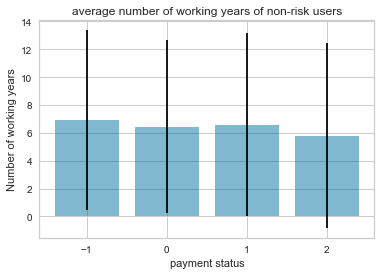

In [28]:
y=[]
error = []
for i in list(non_risk_user.payment_status.unique()):
    df = non_risk_user[non_risk_user.payment_status==i]
    m = df.working_years.mean()
    y.append(m)
    dev = np.std(df.working_years)
    error.append(dev)

fig, ax = plt.subplots()
ax.bar(list(non_risk_user.payment_status.unique()), y, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(list(non_risk_user.payment_status.unique()))
ax.yaxis.grid(True)
ax.set_ylabel('Number of working years')
ax.set_xlabel('payment status')
ax.set_title('average number of working years of non-risk users')

# Save the figure and show
plt.show()

- Fig(11): Dieser Plot zeigt die Anzahl von Jahren, die ein Kunde bereits arbeitet, der nicht oder nur gering in Zahlungsverzug ist. Die meisten dieser Kunden arbeiten seit etwa 6-7 Jahren.

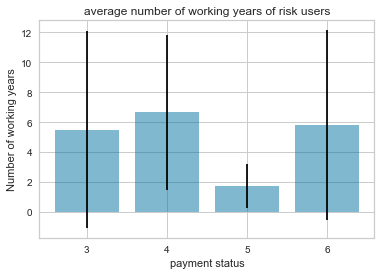

In [29]:
y=[]
error = []
for i in list(risk_user.payment_status.unique()):
    df = risk_user[risk_user.payment_status==i]
    m = df.working_years.mean()
    y.append(m)
    dev = np.std(df.working_years)
    error.append(dev)

fig, ax = plt.subplots()
ax.bar(list(risk_user.payment_status.unique()), y, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(list(risk_user.payment_status.unique()))
ax.yaxis.grid(True)
ax.set_ylabel('Number of working years')
ax.set_xlabel('payment status')
ax.set_title('average number of working years of risk users')

# Save the figure and show
plt.show()

- Fig(12): Dieser Plot zeigt die Anzahl von Jahren, die ein Kunde bereits arbeitet, der stark in Zahlungsverzug ist. Auch hier arbeiten die meisten dieser Kunden schon seit über 5 Jahren. Nur Kunden mit dem payment status 4 arbeiten seit weniger Jahren. Das Ergebnis überrascht, da intuitiv davon ausgegangen wird, dass Kunden mit starkem Zahlungsverzug eventuell arbeitslos sind oder erst seit kurzem Arbeit haben. Möglicherweise haben das Konsumverhalten oder die Höhe des Einkommens stärkere Auswirkungen auf den payment status. 



@Dennis Knierim und Jan Rüdt

***
## Datensplit und Validierung
***


Um Machine Learning Modelle zu trainieren, wird ein Datensatz benötigt. Beim überwachten Lernen müssen Beispielsdaten vorhanden sein, in denen die Zielvariable vorgegeben wird. Hier wird der Datensatz in der Regel in mindestens drei verschiedenen Datensätze unterteilt:
Trainings-, Validierungs- und Testdaten.

![](split.png)

Eine gängige Aufteilung sieht wie folgt aus:
- 70% Trainingsdatensatz
- 20% Validierungsdatensatz
- 10% Testdatensatz

### Trainingsdaten
Dies ist ein Datensatz mit Zielvariablen, die für das Trainieren des maschinellen Modells verwendet werden. Meistens wird dies für Klassifikations- und Regressionsprobleme benötigt. 
Es muss darauf geachtet werden, dass das Modell aus den gelernten Mustern kein Overfitting betreibt. 

### Testdaten
Die Testdaten werden beim Training nicht benutzt und sind von den Trainingsdaten unabhängig. Das Modell kennt die Daten nicht und kann diese nicht zum Lernen nutzen. Die Daten werden im Anschluss dazu verwendet, um die Qualität des Modells zu messen.

### Validierungsdaten
Die Validierungsdaten werden für die Abstimmung der Hyperparameter des Modells benutzt. So kann eine Überanpassung des Modells auf die Trainingsdaten vermieden werden.


### Kreuzvalidierung
Kreuzvalidierung ist eine Vorgehensweise zur Bewertung der Qualität der Modelle. Jeder Durchlauf teilt die Daten des Orginaldatensatzes zufällig in Trainings- und Testdaten ein. Dieser Vorgang wird mehrfach widerholt und der mittlerer Kreuzvalidierungsfehler als Leistungsindikator verwendet. 
Damit kann das Risiko für Over- und Underfitting verringert werden. 

@Jan Rüdt

Pycaret bietet mehrere Methoden an diese Kreuzvalidierung durchzuführen. Im folgenden wird der Unterschied zwischen der verwendeten kfold-Strategie und der stratifiedkfold-strategie erklärt.

bei kfold werden in Daten auf zufälliger Basis in k Datensätze geteilt, auf welche dann nacheinander Trainiert wird (standardvorgang bei einer Kreuzvalidierung).

Die stratifiedKfold-Methode basiert auf der normalen kfold-Methode und stellt bei jedem der einzelnen Aufteilungen der Daten sicher, dass sie die gleiche Anzahl an Observationen der Zielvariable haben. Diese Methode eignet sich am besten bei einem unausgewogenen Datensatz

@Dennis

### Notes:
- Increaded training data to 90% to favoure the training of the model
- Experimenting with different models and different oversamplinng methods
- - so far : random oversampler, smote

In [29]:
cca_for_test = cca_unique_id.drop(['BEGIN_MONTHS','payment_status'], axis= 1)
training_data = cca_for_test.sample(frac=0.9, random_state=25)
testing_data = cca_for_test.drop(training_data.index)

*** 
## Umgang mit einer unausgewogenen Klassifizierung  
*** 
Die Herausforderung bei der Arbeit mit unausgewogenen Datensätzen besteht darin, dass die meisten maschinellen Lerntechniken die "wichtige" Klasse weniger berücksichtig, obwohl normalerweise die Leistung der Minderheitsklasse am wichtigsten ist. Um mit unausgewogenen Daten arbeiten zu können, können unterschiedliche Ansätze gewählt werden. <br><br> 

Mögliche Lösung für unbalanced Dataset: <br> 

- __over sampling__: Ein Ansatz zur Behandlung unausgewogener Datensätze besteht darin, die Minderheitsklasse zu "oversample". Der einfachste Ansatz besteht darin, Beispiele in der Minderheitsklasse zu duplizieren. Dabei bekommt das Modell keine neuen Informationen. Es werden neue Beispiele aus den bestehenden Beispielen synthetisiert. 
<br> 
Vorteil bei der Oversampling ist, dass Informationen nicht verloren gehen, da nichts künstlich gelöscht wird. Nachteil ist aber auch deutlich, es könnte zu overfitting kommen, da wir die Minderheitsklasse vervielfacht haben, die nur synthetisierte Kopien der Daten darstellen.<br> 

- __under sampling__: Eine andere Möglichkeit den unausgewogenen Datensatz zu transformieren, ist die Under-Sampling Methode. Hierbei wird die Größe des gesamten Datensatzes reduziert. Wichtig zu wissen ist, dass alle Stichproben in der Minderheitsklasse beibehalten werden, während in der Mehrheitsklasse zufällige Stichproben in der gleichen Menge wie in der Minderheitsklasse gezogen werden. Da die Sample Size generell reduziert wurde, kann eine verbesserte run time erreicht werden, aber das Verfahren könnte auch dazu führen, dass relevante Informationen bei der random extracting verloren gehen. Solche Verluste können im schlimmsten Fall zu falschen Resultaten führen.<br> 

Generell gesprochen versuchen wir mit der Anwendung solche Methoden, die Klassenverteilung, das Verhältnis zwischen den Klassen, anzupassen. Oversampling und Downsampling sind entgegengesetzte aber ungefähr gleichgültige Techniken. In der Praxis wird jedoch aufgrund von Informationsverlust, die Oversampling bevorzugt. 

@Chengyi Hua<br> 




In unserem Projekt haben wir beide Methoden ausprobiert. Hierei verwendeten wir Pycaret, ein Python Bibliothok.

### Gründe für die Benutzung von PyCaret, ein Open-scource ML Bibliothek.

PyCaret ist eine Open-Source-Low-Code-Bibliothek für maschinelles Lernen in Python, die Arbeitsabläufe für maschinelles Lernen automatisiert. Es ist ein End-to-End-Tool für maschinelles Lernen und Modellmanagement, das den Experimentzyklus exponentiell beschleunigt und sie produktiver macht.
<br>
<br>
Verglichen mit den anderen Open-Source-Bibliotheken für maschinelles Lernen ist PyCaret eine alternative Low-Code-Bibliothek, mit der Hunderte von Codezeilen durch nur wenige Zeilen ersetzt werden können. Dies macht Experimente exponentiell schnell und effizient. PyCaret ist im Wesentlichen ein Python-Wrapper um mehrere Bibliotheken und Frameworks für maschinelles Lernen wie scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray und einige mehr.
<br>
<br>
Da immer mehr Unternehmen ihren Fokus auf maschinelles Lernen verlagern, um schwierige Probleme anzugehen, werden von Datenwissenschaftlern erwartet, dass sie schneller Ergebnisse liefern können. Dies hat die Nachfrage nach der Automatisierung wichtiger Phasen in Data-Science-Projekten erhöht, sodass sich Data Scientists auf das eigentliche Problem konzentrieren können, anstatt Hunderte von Codezeilen zu schreiben, um das optimale Modell zu identifizieren.

@Chengyi Hua


***
# Testen von Methoden für Oversampling und Undersampling
***
Bewertungskriterien:

$$ Recall = {TP\over TP + FN} $$
Da wir den Typ II error, also die False Negatives (FN), auf ein Minimum halten möchten, haben wir darauf geachtet, dass der Recall möglichst weit gegen 1 geht. 

$$ Precision = {TP\over TP + FP} $$
Beschreibt den Anteil der richtigerweise als positiv identifizierten Usern an den insgesamt als positiv identifizierten (auch die fälschlicherweise als positiv identifizierten). Ziel ist dabei die Minimierung der False Positives (FP), also geht dieser wert am Besten gegen 1.

$$ F1Score = 2*{Precision*Recall\over Precision + Recall} $$
Je größer der Unterschied zwischen Precision und Recall, desto kleiner wird der F1-Score. Ziel ist ein hoher Recall bei gleichzeitig hoher Precision, also auch ein hoher (Wert geht gegen 1) F1-Score

Die Ergebnisse der einzelnen Analyse wurde in den beigefügten Excel-Tabellen zusammengefasst.

@Dennis

***
## Oversampling mit Pycaret (Testen von Methoden)
***

### 1. Random Oversampler

In [98]:
stp = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = ['gender','owning_car','children_amt', 'owning_property', 'education_level',
                                    'marital_status', 'housing_type', 
                                    'job'], fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.over_sampling.RandomOverSampler(), fold = 10,
            ignore_features = ['applicant_ID'],
            use_gpu=True)
best_model_with_oversampling_random = compare_models(exclude= ['dummy'],n_select=13)
print(best_model_with_oversampling_random[0])
evaluate_model(best_model_with_oversampling_random[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9966,0.9514,0.0733,0.2000,0.1071,0.1065,0.1202,1.2220
et,Extra Trees Classifier,0.9965,0.9270,0.0567,0.2333,0.0869,0.0862,0.1106,1.3100
lightgbm,Light Gradient Boosting Machine,0.9962,0.9359,0.2783,0.4233,0.3194,0.3176,0.3326,0.3990
dt,Decision Tree Classifier,0.9950,0.6454,0.2933,0.3233,0.2686,0.2663,0.2850,0.1310
knn,K Neighbors Classifier,0.9949,0.5785,0.1608,0.2533,0.1732,0.1709,0.1851,1.8050
gbc,Gradient Boosting Classifier,0.9901,0.9715,0.5725,0.1840,0.2736,0.2700,0.3171,3.2320
ada,Ada Boost Classifier,0.9856,0.9746,0.5925,0.1309,0.2121,0.2079,0.2718,1.0530
nb,Naive Bayes,0.9716,0.9461,0.8317,0.0898,0.1589,0.1539,0.2599,0.0670
lr,Logistic Regression,0.9418,0.9874,0.9467,0.0820,0.1469,0.1417,0.2560,0.6040
ridge,Ridge Classifier,0.9191,0.0000,0.6358,0.0236,0.0452,0.0390,0.1071,0.1100


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3532, verbose=0,
                       warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [102]:
print(best_model_with_oversampling_random[2])
evaluate_model(best_model_with_oversampling_random[2])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3532, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 2. SMOTE

In [100]:
stp = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = ['gender','owning_car','children_amt', 'owning_property', 'education_level',
                                    'marital_status', 'housing_type', 
                                    'job'], fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.over_sampling.SMOTE(), fold = 10,
            ignore_features = ['applicant_ID'],
            use_gpu=True)
best_model_with_oversampling_smote = compare_models(exclude= ['dummy'],n_select=13)
print(best_model_with_oversampling_smote[0])
evaluate_model(best_model_with_oversampling_smote[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9965,0.8797,0.1358,0.6333,0.2165,nan,0.2856,1.3510
rf,Random Forest Classifier,0.9963,0.8358,0.1191,0.4667,0.1865,nan,0.2315,1.7360
lightgbm,Light Gradient Boosting Machine,0.9960,0.8935,0.2983,0.5167,0.3472,0.3455,0.3723,0.6630
dt,Decision Tree Classifier,0.9938,0.6253,0.3540,0.2804,0.3056,0.3029,0.3086,0.6340
ada,Ada Boost Classifier,0.9930,0.8906,0.3907,0.2834,0.3034,0.3005,0.3164,1.8540
gbc,Gradient Boosting Classifier,0.9930,0.8808,0.4102,0.2462,0.2971,0.2941,0.3088,7.9790
knn,K Neighbors Classifier,0.9851,0.6367,0.2001,0.0788,0.1108,0.1059,0.1184,0.6380
ridge,Ridge Classifier,0.9461,0.0000,0.4812,0.0404,0.0740,0.0675,0.1280,0.1080
lda,Linear Discriminant Analysis,0.9461,0.8026,0.4812,0.0404,0.0740,0.0675,0.1280,0.3720
nb,Naive Bayes,0.8947,0.8418,0.8032,0.0310,0.0595,0.0524,0.1432,0.0770


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2068, verbose=0,
                     warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [103]:
print(best_model_with_oversampling_smote[2])
evaluate_model(best_model_with_oversampling_smote[2])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2068, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 2.ADASYNC

In [105]:
stp = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = ['gender','owning_car','children_amt', 'owning_property', 'education_level',
                                    'marital_status', 'housing_type', 
                                    'job'], fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.over_sampling.ADASYN(), fold = 10,
            ignore_features = ['applicant_ID'],
            use_gpu=True)
best_model_with_oversampling_adasync = compare_models(exclude= ['dummy'],n_select=13)
print(best_model_with_oversampling_adasync[0])
evaluate_model(best_model_with_oversampling_adasync[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9966,0.9571,0.0710,0.3000,0.1127,0.1121,0.1434,1.7950
et,Extra Trees Classifier,0.9963,0.9848,0.0710,0.2333,0.1057,0.1049,0.1250,1.2170
lightgbm,Light Gradient Boosting Machine,0.9960,0.9924,0.2843,0.3700,0.3056,0.3038,0.3142,0.5530
dt,Decision Tree Classifier,0.9944,0.6314,0.2660,0.2594,0.2456,0.2430,0.2510,0.7440
gbc,Gradient Boosting Classifier,0.9940,0.9855,0.6112,0.3313,0.3882,0.3857,0.4217,8.0450
ada,Ada Boost Classifier,0.9923,0.9897,0.3726,0.2009,0.2446,0.2414,0.2606,1.9610
knn,K Neighbors Classifier,0.9857,0.6678,0.3019,0.0805,0.1176,0.1130,0.1426,0.7230
ridge,Ridge Classifier,0.9512,0.0000,0.6945,0.0486,0.0898,0.0838,0.1696,0.2030
lda,Linear Discriminant Analysis,0.9512,0.9476,0.6945,0.0486,0.0898,0.0838,0.1696,0.4210
nb,Naive Bayes,0.9042,0.9226,0.8074,0.0355,0.0672,0.0609,0.1528,0.1330


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=336, verbose=0,
                       warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [109]:
print(best_model_with_oversampling_adasync[4])
evaluate_model(best_model_with_oversampling_adasync[4])

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=336, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 3.Borderline SMOTE

In [110]:
stp = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = ['gender','owning_car','children_amt', 'owning_property', 'education_level',
                                    'marital_status', 'housing_type', 
                                    'job'], fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.over_sampling.BorderlineSMOTE(), fold = 10,
            ignore_features = ['applicant_ID'],
            use_gpu=True)
best_model_with_oversampling_bsmote = compare_models(exclude= ['dummy'],n_select=13)
print(best_model_with_oversampling_bsmote[0])
evaluate_model(best_model_with_oversampling_bsmote[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9967,0.9676,0.0292,0.2000,0.0508,0.0505,0.0758,1.7990
et,Extra Trees Classifier,0.9967,0.9194,0.0292,0.2000,0.0508,0.0504,0.0758,1.1380
lightgbm,Light Gradient Boosting Machine,0.9963,0.9899,0.2317,0.3767,0.2718,0.2701,0.2856,0.5040
ada,Ada Boost Classifier,0.9957,0.9693,0.4600,0.4164,0.4192,0.4171,0.4264,2.0280
gbc,Gradient Boosting Classifier,0.9955,0.9865,0.3442,0.2929,0.2787,0.2768,0.2953,8.0280
dt,Decision Tree Classifier,0.9941,0.5937,0.1908,0.1867,0.1767,0.1739,0.1797,0.5360
knn,K Neighbors Classifier,0.9917,0.6553,0.2142,0.1015,0.1257,0.1222,0.1366,0.7220
lr,Logistic Regression,0.9715,0.9520,0.7508,0.1190,0.1946,0.1902,0.2768,0.6680
ridge,Ridge Classifier,0.9390,0.0000,0.3875,0.0255,0.0471,0.0412,0.0853,0.1670
lda,Linear Discriminant Analysis,0.9390,0.7893,0.3875,0.0255,0.0471,0.0412,0.0853,0.3790


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3281, verbose=0,
                       warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [1]:
print(best_model_with_oversampling_bsmote[7])
evaluate_model(best_model_with_oversampling_bsmote[7])

NameError: name 'best_model_with_oversampling_bsmote' is not defined

### 4.SVMSMOTE

In [116]:
stp = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = ['gender','owning_car','children_amt', 'owning_property', 'education_level',
                                    'marital_status', 'housing_type', 
                                    'job'], fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.over_sampling.SVMSMOTE(), fold = 10,
            ignore_features = ['applicant_ID'],
            use_gpu=True)
best_model_with_oversampling_kmeans = compare_models(exclude= ['dummy'],n_select=13)
print(best_model_with_oversampling_kmeans[0])
evaluate_model(best_model_with_oversampling_kmeans[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9971,0.9440,0.1083,0.3500,0.1571,0.1567,0.1873,1.3890
et,Extra Trees Classifier,0.9970,0.9188,0.1083,0.3500,0.1571,0.1566,0.1872,1.6190
lightgbm,Light Gradient Boosting Machine,0.9963,0.9655,0.2238,0.4000,0.2660,0.2643,0.2845,1.0890
gbc,Gradient Boosting Classifier,0.9960,0.9880,0.2476,0.3045,0.2545,0.2527,0.2629,5.6980
ada,Ada Boost Classifier,0.9959,0.9867,0.3131,0.3125,0.3046,0.3027,0.3066,1.4220
dt,Decision Tree Classifier,0.9949,0.6170,0.2369,0.2283,0.2203,0.2182,0.2238,0.4120
knn,K Neighbors Classifier,0.9917,0.6004,0.0952,0.0458,0.0614,0.0579,0.0620,1.6220
lr,Logistic Regression,0.9901,0.9742,0.7714,0.2051,0.3121,0.3090,0.3834,0.5790
ridge,Ridge Classifier,0.9788,0.0000,0.2952,0.0722,0.0945,0.0902,0.1192,0.2960
lda,Linear Discriminant Analysis,0.9782,0.8571,0.2952,0.0657,0.0900,0.0856,0.1145,0.5330


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4126, verbose=0,
                       warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4126, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

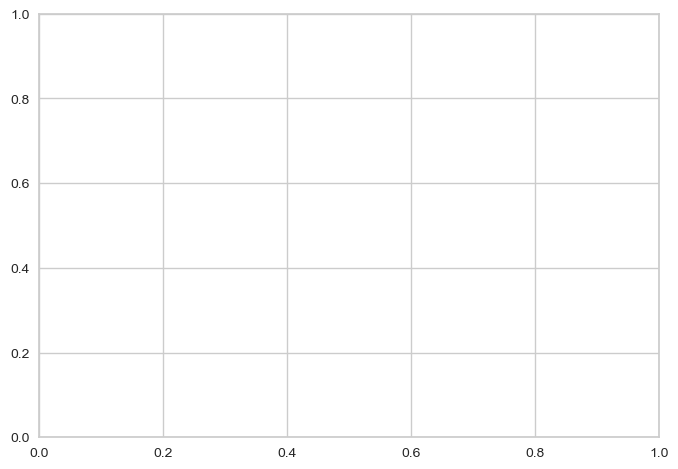

In [119]:
print(best_model_with_oversampling_kmeans[7])
evaluate_model(best_model_with_oversampling_kmeans[7])

***
### Oversampling Entscheidung: logistic Regression with SVMSMOTE Methode
***
Aufgrund der Testergebnisse wird hier für die SVM-SMOTE oversampling Methode entscheiden. Dazu wird fundamentales Wissen über SMOTE benötigt. Synthetic Minority Oversampling Technique (SMOTE) ist eine wohlbekannte Oversampling-Technik für unausgeglichene Datenklassifikationsprobleme im Datenvorverarbeitungsschritt. SMOTE generiert synthetische Instanzen unter Verwendung der linearen Interpolation innerhalb der Minderheitenklasse, und es "zwingt" effektiv die Region der Minderheitenklasse, breiter zu werden. Kurz gesagt, SMOTE wählt zuerst zufällig eine Minoritätsinstanz aus und findet die k-nearest Nachbarn dieser Instanz. An einer zufällig ausgewählten Stelle auf der Linie zwischen der Instanz und einen Nachbar wird dann eine synthetische Instanz erstellt. 

Vorgehensweise zusammengefasst: 
1. Wähle zufällige Instanz aus der Minderheitsklasse  
2. Finde die k-nearest Nachbarn von der Instanz  
3. Berechne die Differenz zwischen der Instanz und einer der Nachbarn und multipliziere es mit eine zufällig gewählte Nummer Gap zwischen 0 und 1 
4. Füge das Resultat aus dem vorherigen Schritt zu der Instanz hinzu und erstelle somit eine synthetische neue Instanz 

![](SMOTE.png) fig(13) Source: siehe Hilfsmittelübersicht

where:
- x(j) ist die j-th feature der gewählte Instanz x
- x(j)neighbor ist die j-th feature eine zufällog ausgesuchte Nachbar von der Instanz x
- gap(j) ist die uniformly distributed random variable von (0, 1) für die j-th feature

Visuelle Dastellung:

![](SMOTEV.png) fig(14) Source: siehe Hilfsmittelübersicht

Eine alternative Erweiterung der SMOTE Methode ist, indem man einen Support Vector Machine (SVM)-Algorithmus anstelle des k-nächsten-Nachbar-Algorithmus verwendet, um die falsch klassifizierten Instanzen an der Entscheidungsgrenze zu identifizieren. Diese Methode wird als SVM-SMOTE bezeichnet. Die SVM wird verwendet, um eine Hilfslinie zwischen eine Instanz und eines zufällig gewählten Nachbarn zu ziehen. Dabei können synthetische neue Instanzen entweder eine Extrapolation oder Interpolation sein. Siehe fig15 

![](SVMSMOTE.png) fig(15) Source: siehe Hilfsmittelübersicht

Das Hauptmerkmal von SVM-SMOTE ist die Verwendung von Extrapolation, um die Minderheit zu erweitern, wenn es weniger Mehrheitsklasseninstanzen gibt. Somit hilft dieser Algorithmus Instanzen von Minderheitenklassen in der Nähe der idealen Grenze zu sehen.

@Chengyi Hua 


In [71]:
stp = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = ['gender','owning_car','children_amt', 'owning_property', 'education_level',
                                    'marital_status', 'housing_type', 
                                    'job'], fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.over_sampling.SVMSMOTE(), fold = 10,
            ignore_features = ['applicant_ID'],
            use_gpu=True)
best_model_with_oversampling_svm_025 = compare_models(include= ['lr'])
print(best_model_with_oversampling_svm_025)
evaluate_model(best_model_with_oversampling_svm_025)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9826,0.9708,0.7421,0.1584,0.2450,0.2411,0.3175,0.5110


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4599, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [72]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9959,0.9984,1.0000,0.4444,0.6154,0.6136,0.6653
1,0.9870,0.9951,1.0000,0.0588,0.1111,0.1097,0.2409
2,0.9910,0.9362,0.5000,0.1818,0.2667,0.2631,0.2979
3,0.9829,0.9854,0.5714,0.1818,0.2759,0.2695,0.3160
4,0.9845,0.9926,0.7500,0.1429,0.2400,0.2358,0.3232
5,0.9886,0.9913,0.6000,0.2000,0.3000,0.2957,0.3421
6,0.9756,0.9793,0.6667,0.0645,0.1176,0.1137,0.2023
7,0.9837,0.9951,0.8333,0.2083,0.3333,0.3281,0.4119
8,0.9658,0.8357,0.5000,0.0476,0.0870,0.0815,0.1465


In [73]:
tuned_lr = tune_model(lr, n_iter=100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9943,0.9982,0.7500,0.3333,0.4615,0.4591,0.4977
1,0.9870,0.9951,1.0000,0.0588,0.1111,0.1097,0.2409
2,0.9910,0.9362,0.5000,0.1818,0.2667,0.2631,0.2979
3,0.9829,0.9854,0.5714,0.1818,0.2759,0.2695,0.3160
4,0.9845,0.9926,0.7500,0.1429,0.2400,0.2358,0.3232
5,0.9886,0.9918,0.6000,0.2000,0.3000,0.2957,0.3421
6,0.9764,0.8200,0.6667,0.0667,0.1212,0.1173,0.2059
7,0.9837,0.9945,0.8333,0.2083,0.3333,0.3281,0.4119
8,0.9658,0.8357,0.5000,0.0476,0.0870,0.0815,0.1465


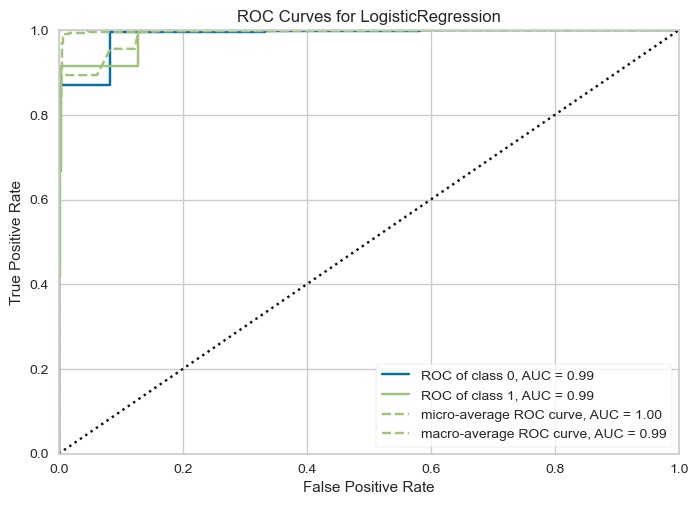

In [74]:
plot_model(tuned_lr,'auc')

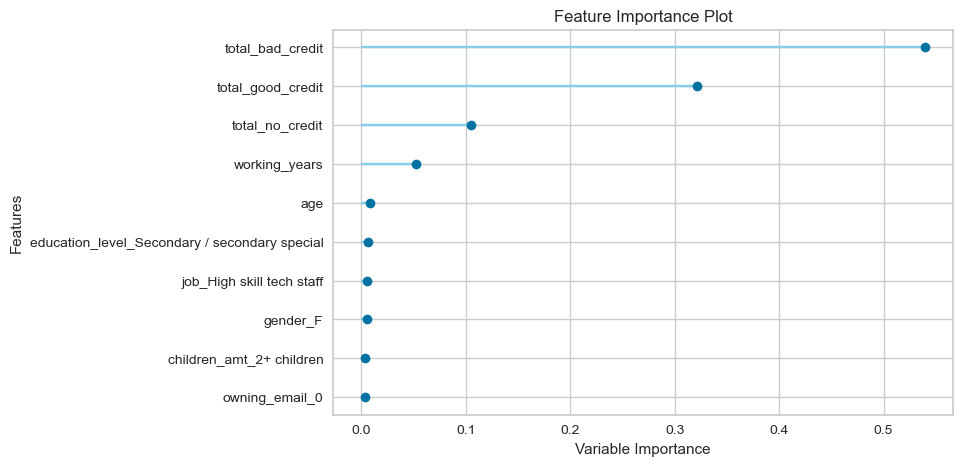

In [75]:
plot_model(tuned_lr, 'feature')

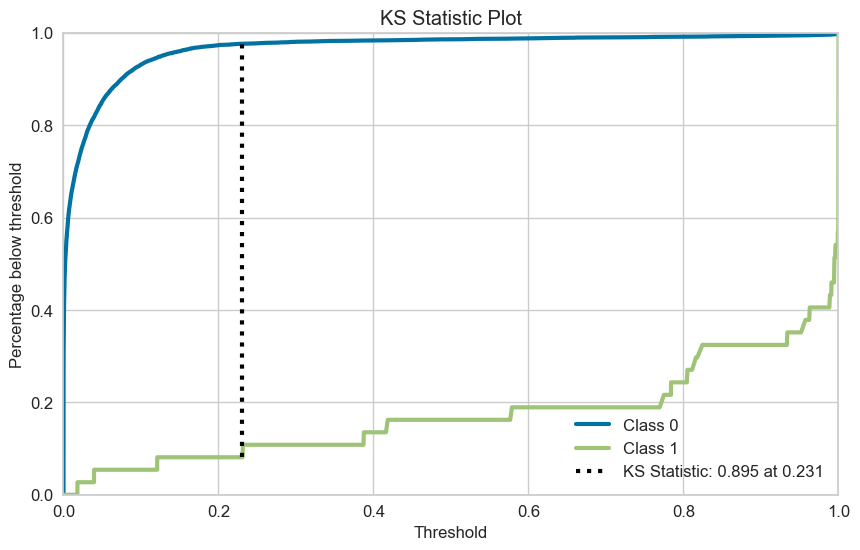

In [190]:
plot_model(tuned_lr,'ks')

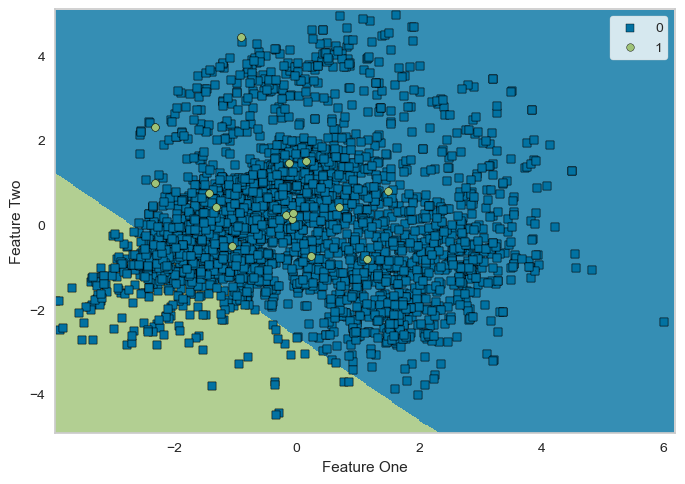

In [191]:
plot_model(tuned_lr, 'boundary')

In [195]:
preddf = predict_model(tuned_lr, data=testing_data, raw_score=True, probability_threshold=0.4)
preddf

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9865,0.9948,0.9091,0.3125,0.4651,0.4599,0.5287


,applicant_ID,gender,owning_car,owning_property,children_amt,anual_income,education_level,marital_status,housing_type,age,...,owning_phone,owning_email,job,risk_user,total_good_credit,total_bad_credit,total_no_credit,Label,Score_0,Score_1
149282,5008842,M,0,1,1 children,405000.0,Higher education,Married,House / apartment,32,...,0,0,Managers,0,9,0,0,0,0.9741,0.0259
241284,5008858,F,1,1,2+ children,135000.0,Secondary / secondary special,Married,House / apartment,43,...,0,0,Laborers,0,11,0,0,0,0.9882,0.0118
373341,5008874,F,0,1,2+ children,126000.0,Higher education,Married,House / apartment,34,...,0,1,Managers,0,46,0,0,0,1.0000,0.0000
284401,5008933,F,0,1,No children,297000.0,Secondary / secondary special,Single / not married,Rented apartment,42,...,0,0,Laborers,0,6,0,0,0,0.9630,0.0370
20411,5008943,F,0,0,No children,157500.0,Higher education,Married,House / apartment,37,...,1,0,High skill tech staff,0,0,0,15,0,0.9977,0.0023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44266,5150330,M,0,1,No children,153000.0,Secondary / secondary special,Married,House / apartment,33,...,0,0,Laborers,0,6,0,0,0,0.9367,0.0633
194565,5150332,M,0,1,No children,153000.0,Secondary / secondary special,Married,House / apartment,33,...,0,0,Laborers,0,20,1,0,0,0.9924,0.0076
381755,5150356,F,0,1,No children,175500.0,Higher education,Married,House / apartment,41,...,1,0,Managers,0,18,0,1,0,0.9980,0.0020
203333,5150389,F,1,1,1 children,315000.0,Secondary / secondary special,Married,Municipal apartment,44,...,0,0,Medicine staff,0,9,0,18,0,0.9999,0.0001


In [196]:
wrong_pred_df = preddf[preddf.risk_user!=preddf.Label]
wrong_pred_df

,applicant_ID,gender,owning_car,owning_property,children_amt,anual_income,education_level,marital_status,housing_type,age,...,owning_phone,owning_email,job,risk_user,total_good_credit,total_bad_credit,total_no_credit,Label,Score_0,Score_1
419518,5009908,M,1,0,No children,202500.0,Secondary / secondary special,Married,House / apartment,52,...,0,0,Drivers,0,4,3,1,1,0.5696,0.4304
251452,5023623,F,0,0,2+ children,180000.0,Incomplete higher,Married,House / apartment,37,...,1,0,Sales staff,0,11,4,0,1,0.4886,0.5114
297590,5023963,M,0,1,2+ children,90000.0,Secondary / secondary special,Married,House / apartment,34,...,0,0,Core staff,0,5,19,24,1,0.0000,1.0000
89678,5024448,M,1,1,No children,180000.0,Secondary / secondary special,Married,House / apartment,34,...,1,0,Managers,0,38,11,0,1,0.1978,0.8022
385715,5024472,F,0,1,2+ children,135000.0,Secondary / secondary special,Married,House / apartment,27,...,0,0,Medicine staff,0,17,5,0,1,0.4612,0.5388
32714,5024564,F,0,0,No children,270000.0,Secondary / secondary special,Single / not married,House / apartment,32,...,1,1,High skill tech staff,0,19,7,0,1,0.1578,0.8422
61729,5028548,M,1,0,1 children,292500.0,Secondary / secondary special,Separated,House / apartment,34,...,1,0,Laborers,0,16,5,0,1,0.4595,0.5405
17337,5033886,M,0,1,No children,135000.0,Secondary / secondary special,Civil marriage,House / apartment,24,...,0,0,Low-skill Laborers,0,3,6,1,1,0.0114,0.9886
375110,5046114,M,0,0,No children,126000.0,Higher education,Single / not married,House / apartment,34,...,1,0,Core staff,0,7,3,0,1,0.4504,0.5496
446924,5047662,F,0,1,1 children,67500.0,Secondary / secondary special,Married,House / apartment,51,...,0,0,Accountants,0,6,18,11,1,0.0000,1.0000


In [197]:
wrong_pred_df[wrong_pred_df.Label==0]

,applicant_ID,gender,owning_car,owning_property,children_amt,anual_income,education_level,marital_status,housing_type,age,...,owning_phone,owning_email,job,risk_user,total_good_credit,total_bad_credit,total_no_credit,Label,Score_0,Score_1
375396,5116455,F,1,1,No children,135000.0,Secondary / secondary special,Civil marriage,House / apartment,49,...,0,0,Medicine staff,1,15,5,1,0,0.7047,0.2953


***
## Downsampling mit Pycaret (Testen von Methoden)
***

### 1.Random undersampler

In [199]:
stp_downsampled = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = categorical_features,  fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.under_sampling.RandomUnderSampler() , fold = 10,
            ignore_features = ['applicant_ID'],use_gpu=True)

,Description,Value
0,session_id,735
1,Target,risk_user
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15339, 19)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [31]:
best_model_with_downsampling_random = compare_models(exclude = ['dummy'],n_select=13)

ValueError: _CURRENT_EXPERIMENT global variable is not set. Please run setup() first.

In [209]:
evaluate_model(best_model_with_downsampling_random[1])


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 2.Condensed Nearest Neighbors

In [30]:
stp_downsampled = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = categorical_features,  fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.under_sampling.CondensedNearestNeighbour() , fold = 10,
            ignore_features = ['applicant_ID'],use_gpu=True)

,Description,Value
0,session_id,7826
1,Target,risk_user
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15339, 19)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [31]:
best_model_with_downsampling_Condensed = compare_models(include=['lr'], n_select=13)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9959,0.8885,0.5175,0.3571,0.3949,0.3932,0.4130,53.8590


In [33]:
evaluate_model(best_model_with_downsampling_Condensed)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 3.ALLKNN

In [39]:
stp_downsampled = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = categorical_features,  fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.under_sampling.AllKNN() , fold = 10,
            ignore_features = ['applicant_ID'],use_gpu=True)

,Description,Value
0,session_id,4199
1,Target,risk_user
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15339, 19)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [40]:
best_model_with_downsampling_ALLKNN = compare_models(exclude=['dummy'],n_select=13)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9968,0.0000,0.1208,0.3000,0.1579,0.1577,0.1795,1.7170
knn,K Neighbors Classifier,0.9967,0.6337,0.1108,0.5000,0.1789,0.1783,0.2320,2.1630
rf,Random Forest Classifier,0.9967,0.9504,0.0908,0.3500,0.1389,0.1385,0.1728,2.4670
et,Extra Trees Classifier,0.9967,0.9461,0.1408,0.3750,0.1806,0.1801,0.2123,2.4590
lr,Logistic Regression,0.9966,0.9033,0.2783,0.4083,0.3083,0.3071,0.3233,1.9750
svm,SVM - Linear Kernel,0.9964,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7990
lightgbm,Light Gradient Boosting Machine,0.9963,0.9631,0.4058,0.4533,0.4023,0.4007,0.4138,1.8920
ada,Ada Boost Classifier,0.9959,0.9616,0.3492,0.4500,0.3722,0.3703,0.3831,2.1710
gbc,Gradient Boosting Classifier,0.9959,0.9305,0.2333,0.3167,0.2576,0.2560,0.2642,3.4590
dt,Decision Tree Classifier,0.9952,0.7194,0.4417,0.3585,0.3762,0.3740,0.3854,1.6490


In [57]:
evaluate_model(best_model_with_downsampling_ALLKNN[-2])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 4.Instance Hardness Threshold

In [44]:
stp_downsampled = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = categorical_features,  fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.under_sampling.InstanceHardnessThreshold() , fold = 10,
            ignore_features = ['applicant_ID'],use_gpu=True)

,Description,Value
0,session_id,3386
1,Target,risk_user
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15339, 19)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [45]:
best_model_with_downsampling_Instance = compare_models(exclude=['dummy'],n_select=13)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9970,0.9757,0.2360,0.4500,0.2846,0.2838,0.3092,4.9760
ridge,Ridge Classifier,0.9969,0.0000,0.2776,0.4917,0.3333,0.3322,0.3543,3.0110
svm,SVM - Linear Kernel,0.9967,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.1370
knn,K Neighbors Classifier,0.9966,0.6835,0.0000,0.0000,0.0000,-0.0001,-0.0002,4.6380
rf,Random Forest Classifier,0.9957,0.9041,0.3002,0.3021,0.2792,0.2773,0.2877,3.6900
lr,Logistic Regression,0.9932,0.9263,0.4800,0.2210,0.2900,0.2875,0.3144,3.1660
nb,Naive Bayes,0.9931,0.9591,0.3371,0.1690,0.2188,0.2158,0.2318,2.9660
ada,Ada Boost Classifier,0.9918,0.9922,0.6619,0.2380,0.3362,0.3332,0.3840,3.1630
gbc,Gradient Boosting Classifier,0.9912,0.9919,0.6679,0.2235,0.3234,0.3203,0.3746,4.0960
lightgbm,Light Gradient Boosting Machine,0.9906,0.9093,0.6240,0.2036,0.2916,0.2883,0.3415,3.0270


In [58]:
evaluate_model(best_model_with_downsampling_Instance[-6])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 5.NearMiss

In [51]:
stp_downsampled = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = categorical_features,  fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.under_sampling.NearMiss() , fold = 10,
            ignore_features = ['applicant_ID'],use_gpu=True)

,Description,Value
0,session_id,7277
1,Target,risk_user
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15339, 19)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [52]:
best_model_with_downsampling_NM = compare_models(exclude=['dummy'],n_select=13)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9544,0.8324,0.8067,0.0523,0.0964,0.0916,0.1897,0.0760
lightgbm,Light Gradient Boosting Machine,0.9538,0.8775,0.8433,0.0613,0.1112,0.1067,0.2073,0.1670
gbc,Gradient Boosting Classifier,0.7429,0.8531,0.8433,0.0187,0.0360,0.0304,0.0984,0.1410
ada,Ada Boost Classifier,0.5299,0.7655,0.8600,0.0095,0.0187,0.0129,0.0603,0.1640
rf,Random Forest Classifier,0.4431,0.8333,0.8633,0.0049,0.0097,0.0039,0.0374,0.5250
ridge,Ridge Classifier,0.4087,0.0000,0.7224,0.0038,0.0076,0.0018,0.0197,0.1100
lr,Logistic Regression,0.3978,0.7034,0.8057,0.0128,0.0245,0.0189,0.0561,0.1140
lda,Linear Discriminant Analysis,0.3967,0.4503,0.4729,0.0027,0.0053,-0.0005,-0.0061,0.1140
et,Extra Trees Classifier,0.3122,0.6729,0.8667,0.0041,0.0081,0.0023,0.0282,0.5340
svm,SVM - Linear Kernel,0.3008,0.0000,0.6000,0.0019,0.0037,0.0000,0.0000,0.1050


### 5.Neighbourhood Cleaning Rule

In [55]:
stp_downsampled = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = categorical_features,  fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.under_sampling.NeighbourhoodCleaningRule() , fold = 10,
            ignore_features = ['applicant_ID'],use_gpu=True)

,Description,Value
0,session_id,1219
1,Target,risk_user
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15339, 19)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [56]:
best_model_with_downsampling_NCR = compare_models(exclude=['dummy'],n_select=13)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9971,0.8617,0.2612,0.4000,0.3088,0.3079,0.3185,1.1480
rf,Random Forest Classifier,0.9971,0.9581,0.1701,0.5000,0.2389,0.2385,0.2787,1.7210
et,Extra Trees Classifier,0.9971,0.9548,0.2151,0.4967,0.2721,0.2715,0.3076,1.7700
ridge,Ridge Classifier,0.9969,0.0000,0.1001,0.4000,0.1544,0.1540,0.1938,0.9590
ada,Ada Boost Classifier,0.9967,0.9579,0.3619,0.6333,0.4350,0.4335,0.4629,1.4420
knn,K Neighbors Classifier,0.9966,0.6540,0.0375,0.1500,0.0556,0.0553,0.0705,1.2390
lightgbm,Light Gradient Boosting Machine,0.9966,0.8729,0.3385,0.5333,0.3758,0.3743,0.3998,1.2320
svm,SVM - Linear Kernel,0.9965,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0370
gbc,Gradient Boosting Classifier,0.9960,0.8761,0.3586,0.4062,0.3573,0.3559,0.3678,2.6070
dt,Decision Tree Classifier,0.9959,0.6757,0.3535,0.3697,0.3329,0.3311,0.3449,0.8920


***
### Downsampling Entscheidung: logistic regression and condensed nearest neighbour Methode
***

Aufgrund der Testergebnisse wird hier für die condensed nearest neighbour downsampling Methode entscheiden.
Beim CNN(condensed nearest neighbour)-Undersampling ist das Ziel, eine Teilmenge U auszuwählen des Trainingssatzes T auszuwählen, so dass für jeden Punkt in T seine
nächste Nachbar in U von der anderen Klasse ist. 

![](CNN.png) fig(16) Source: siehe Hilfsmittelübersicht

Vorgehensweise von CNN: 
1. Wähle ein zufälliger Punkt p aus T und setze U = {p} 
2. Untersuche T-U (Unterschied) und füge den erstgefundenen Punkt, bei dem der Nachbar von der anderen Klasse ist  
3. Wiederhole Schritt 2 bis Teilmenge U maximal ist und keine weiteren Punkte das Kriterium erfüllt 
<br>

@Chengyi Hua

In [61]:
stp_downsampled = pycaret.classification.setup(data = training_data, target = 'risk_user', train_size = 0.8,
            categorical_features = categorical_features,  fold_strategy = 'kfold',
            fix_imbalance = True, fix_imbalance_method = imblearn.under_sampling.CondensedNearestNeighbour() , fold = 10,
            ignore_features = ['applicant_ID'],use_gpu=True)


,Description,Value
0,session_id,3282
1,Target,risk_user
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15339, 19)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [62]:
down_model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9951,0.9988,1.0000,0.2500,0.4000,0.3984,0.4988
1,0.9984,0.9980,0.5000,0.5000,0.5000,0.4992,0.4992
2,0.9976,0.8792,0.4000,1.0000,0.5714,0.5704,0.6317
3,0.9959,0.9780,0.5714,0.6667,0.6154,0.6133,0.6152
4,0.9959,0.9959,0.0000,0.0000,0.0000,-0.0013,-0.0016
5,0.9967,0.9177,0.8000,0.5714,0.6667,0.6651,0.6746
6,0.9935,0.9625,0.4000,0.2857,0.3333,0.3301,0.3349
7,0.9976,0.9896,0.5000,0.6667,0.5714,0.5702,0.5762
8,0.9902,0.9955,1.0000,0.1429,0.2500,0.2479,0.3761


In [63]:
tuned_down_model = tune_model(down_model, n_iter=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9951,0.9984,1.0000,0.2500,0.4000,0.3984,0.4988
1,0.9967,0.9931,0.5000,0.2500,0.3333,0.3319,0.3521
2,0.9976,0.8792,0.4000,1.0000,0.5714,0.5704,0.6317
3,0.9959,0.9781,0.5714,0.6667,0.6154,0.6133,0.6152
4,0.9959,0.9959,0.0000,0.0000,0.0000,-0.0013,-0.0016
5,0.9967,0.9177,0.8000,0.5714,0.6667,0.6651,0.6746
6,0.9935,0.9624,0.4000,0.2857,0.3333,0.3301,0.3349
7,0.9967,0.9869,0.5000,0.5000,0.5000,0.4984,0.4984
8,0.9902,0.9955,1.0000,0.1429,0.2500,0.2479,0.3761


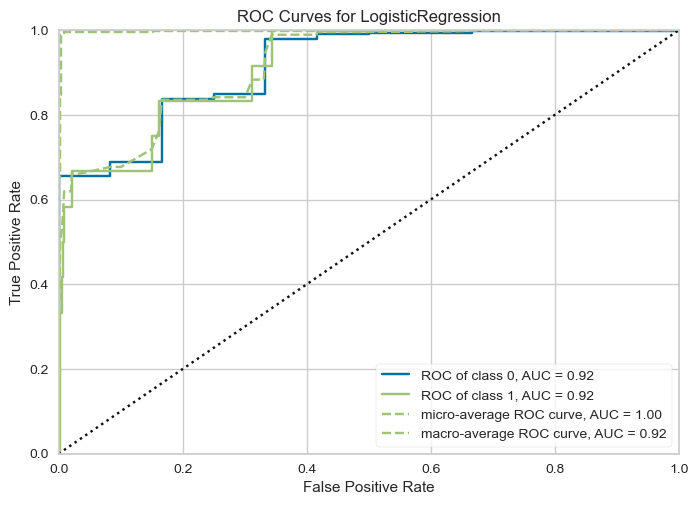

In [67]:
plot_model(down_model,'auc')

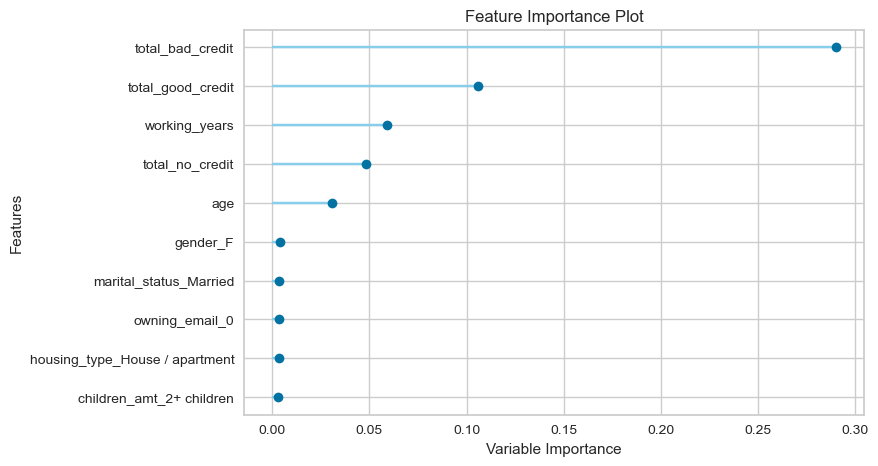

In [69]:
plot_model(down_model, 'feature')

# Berechnung der Feature Importances mit Pycaret
Pycaret benutzt zur berechnung der Feature Importance in diesem Fall aus dem modul sklearn.linear_model.LogisticRegression die Funktion coef_ [Git1]. Das heißt das hier die Regressionskoeffizienten der einzelenen Features als Feature Importances angegeben werden. 

Vereinfacht gibt ein Regressionskoeffizient lediglich die Steigung der Regressionskurve an. Bei einer multiplen Regression lässt sich somit der Einfluss der einzelnen Variablen auf den Zielwert bestimmen.
@Dennis

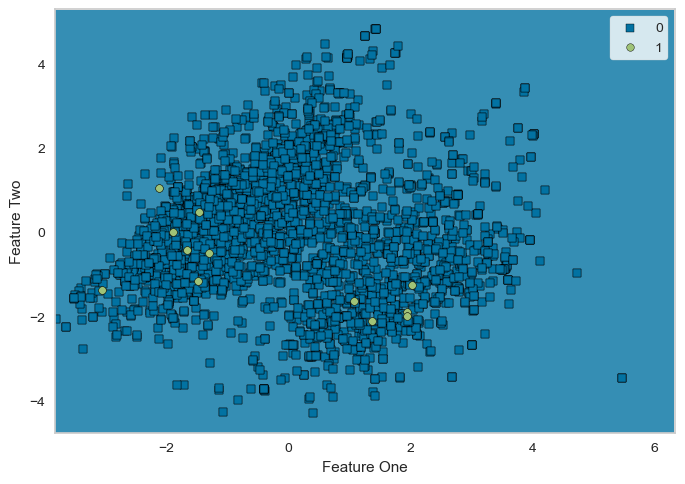

In [68]:
plot_model(down_model,'boundary')

In [64]:
preddf = predict_model(down_model, data=testing_data, raw_score=True, probability_threshold=0.4)
preddf

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9941,0.9517,0.6364,0.5385,0.5833,0.5804,0.5825


,applicant_ID,gender,owning_car,owning_property,children_amt,anual_income,education_level,marital_status,housing_type,age,...,owning_phone,owning_email,job,risk_user,total_good_credit,total_bad_credit,total_no_credit,Label,Score_0,Score_1
149282,5008842,M,0,1,1 children,405000.0,Higher education,Married,House / apartment,32,...,0,0,Managers,0,9,0,0,0,0.9269,0.0731
241284,5008858,F,1,1,2+ children,135000.0,Secondary / secondary special,Married,House / apartment,43,...,0,0,Laborers,0,11,0,0,0,0.9563,0.0437
373341,5008874,F,0,1,2+ children,126000.0,Higher education,Married,House / apartment,34,...,0,1,Managers,0,46,0,0,0,0.9981,0.0019
284401,5008933,F,0,1,No children,297000.0,Secondary / secondary special,Single / not married,Rented apartment,42,...,0,0,Laborers,0,6,0,0,0,0.9325,0.0675
20411,5008943,F,0,0,No children,157500.0,Higher education,Married,House / apartment,37,...,1,0,High skill tech staff,0,0,0,15,0,0.9407,0.0593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44266,5150330,M,0,1,No children,153000.0,Secondary / secondary special,Married,House / apartment,33,...,0,0,Laborers,0,6,0,0,0,0.8557,0.1443
194565,5150332,M,0,1,No children,153000.0,Secondary / secondary special,Married,House / apartment,33,...,0,0,Laborers,0,20,1,0,0,0.9514,0.0486
381755,5150356,F,0,1,No children,175500.0,Higher education,Married,House / apartment,41,...,1,0,Managers,0,18,0,1,0,0.9764,0.0236
203333,5150389,F,1,1,1 children,315000.0,Secondary / secondary special,Married,Municipal apartment,44,...,0,0,Medicine staff,0,9,0,18,0,0.9906,0.0094


In [65]:
wrong_pred_df = preddf[preddf.risk_user!=preddf.Label]
wrong_pred_df

,applicant_ID,gender,owning_car,owning_property,children_amt,anual_income,education_level,marital_status,housing_type,age,...,owning_phone,owning_email,job,risk_user,total_good_credit,total_bad_credit,total_no_credit,Label,Score_0,Score_1
279407,5010868,M,1,1,1 children,450000.0,Secondary / secondary special,Married,House / apartment,49,...,1,1,Core staff,1,10,7,0,0,0.7166,0.2834
297590,5023963,M,0,1,2+ children,90000.0,Secondary / secondary special,Married,House / apartment,34,...,0,0,Core staff,0,5,19,24,1,0.0795,0.9205
17337,5033886,M,0,1,No children,135000.0,Secondary / secondary special,Civil marriage,House / apartment,24,...,0,0,Low-skill Laborers,0,3,6,1,1,0.3858,0.6142
446924,5047662,F,0,1,1 children,67500.0,Secondary / secondary special,Married,House / apartment,51,...,0,0,Accountants,0,6,18,11,1,0.1472,0.8528
425934,5061467,M,1,1,No children,90000.0,Secondary / secondary special,Married,House / apartment,32,...,1,0,Laborers,0,3,15,0,1,0.0612,0.9388
419587,5061650,M,0,1,1 children,157500.0,Incomplete higher,Married,House / apartment,24,...,0,0,Core staff,0,8,7,0,1,0.4810,0.5190
196613,5115611,F,0,1,No children,202500.0,Secondary / secondary special,Single / not married,House / apartment,39,...,0,0,Core staff,1,3,2,0,0,0.8363,0.1637
375396,5116455,F,1,1,No children,135000.0,Secondary / secondary special,Civil marriage,House / apartment,49,...,0,0,Medicine staff,1,15,5,1,0,0.9641,0.0359
20724,5125763,M,1,0,1 children,135000.0,Secondary / secondary special,Single / not married,House / apartment,35,...,1,0,Laborers,1,1,2,2,0,0.7395,0.2605
339625,5135483,M,0,1,No children,135000.0,Higher education,Single / not married,Municipal apartment,29,...,0,0,Core staff,0,5,5,0,1,0.5922,0.4078


In [66]:
wrong_pred_df[wrong_pred_df.Label==0]

,applicant_ID,gender,owning_car,owning_property,children_amt,anual_income,education_level,marital_status,housing_type,age,...,owning_phone,owning_email,job,risk_user,total_good_credit,total_bad_credit,total_no_credit,Label,Score_0,Score_1
279407,5010868,M,1,1,1 children,450000.0,Secondary / secondary special,Married,House / apartment,49,...,1,1,Core staff,1,10,7,0,0,0.7166,0.2834
196613,5115611,F,0,1,No children,202500.0,Secondary / secondary special,Single / not married,House / apartment,39,...,0,0,Core staff,1,3,2,0,0,0.8363,0.1637
375396,5116455,F,1,1,No children,135000.0,Secondary / secondary special,Civil marriage,House / apartment,49,...,0,0,Medicine staff,1,15,5,1,0,0.9641,0.0359
20724,5125763,M,1,0,1 children,135000.0,Secondary / secondary special,Single / not married,House / apartment,35,...,1,0,Laborers,1,1,2,2,0,0.7395,0.2605


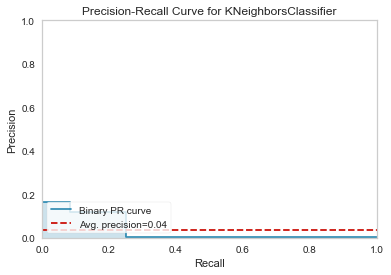

In [21]:
plot_model(best_model_with_downsampling, plot = 'pr')



Notiz: generell sieht man hier, das das Model anfang erst underfittet bzw unfähig ist mit der Komplesitöt im Datensatz klarzukommen.

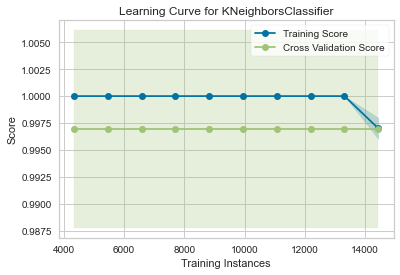

In [22]:
plot_model(best_model_with_downsampling, plot = 'learning')

## Hilfsmittel und Literaturverweis

Datensatz:
- __[Credit Card Approval Prediction](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction)__


Wissen:
- __[Was ist eine Confusion Matrix?](https://www.kompetenzzentrum-usability.digital/definition/confusion-matrix)__
- __[Datenaufbereitung](https://www.bigdata-insider.de/datenaufbereitung-ist-ein-unterschaetzter-prozess-a-803469/)__
- __[Datenaufbereitung](https://www.talend.com/de/resources/what-is-data-preparation/)__
- __[Was ist deskriptive Analyse?](https://pestleanalysis.com/descriptive-analysis/#What_Is_Descriptive_Analysis)__
- __[Datensplit und Validierung](https://datasolut.com/wiki/trainingsdaten-und-testdaten-machine-learning/)__
- __[Kreuzvalidierung](https://de.mathworks.com/discovery/cross-validation.html)__
- __[Was ist imbalanced Klassidikation?](https://machinelearningmastery.com/what-is-imbalanced-classification/)__ 
- __[SMOTE Varianten für Imbalanced Binary Classification](https://escholarship.org/content/qt99x0w9w0/qt99x0w9w0_noSplash_6386a738c0e8b3d02aa47b6a4cda0b3f.pdf)__ 
- __[resampling techniques for improving classification performance](https://arxiv.org/pdf/1608.06048.pdf)__
- __[CNN - Condensed Nearest Neighbour](https://bobrupakroy.medium.com/condensed-nearest-neighbor-rule-undersampling-cnn-380c0d84ca88)__
- [Git1] __[GitHub: How exactly is feature importance calculated](https://github.com/pycaret/pycaret/issues/293)__


Bilder:

- fig 1:  __[confusionsmatrix](https://artemoppermann.com/de/accuracy-precision-recall-f1-score-und-specificity/)__
- fig 13: __[SMOTE formal](https://escholarship.org/content/qt99x0w9w0/qt99x0w9w0_noSplash_6386a738c0e8b3d02aa47b6a4cda0b3f.pdf)__
- fig 14: __[SMOTE visual](https://escholarship.org/content/qt99x0w9w0/qt99x0w9w0_noSplash_6386a738c0e8b3d02aa47b6a4cda0b3f.pdf)__
- fig 15: __[SVM SMOTE visual](https://escholarship.org/content/qt99x0w9w0/qt99x0w9w0_noSplash_6386a738c0e8b3d02aa47b6a4cda0b3f.pdf)__
- fig 16: __[CNN visual](https://arxiv.org/pdf/1608.06048.pdf)__